# Create an InterActive Graph of Lab Analysis Results Related to Mg

In [64]:
#This program collects the relevant data on Mg from ore prep to hpal to ms product

In [47]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from dateutil.parser import parse
from itertools import compress
from collections import OrderedDict
from datetime import date
import datetime
import re
from datetime import timedelta
import openpyxl
from sklearn.metrics import mean_squared_error
import plotly.express as px

In [92]:
wb1 = openpyxl.load_workbook(r'\\thgobna001\userdata\THPAL\Department\TAGANITO\SHARED\AnalysisResult\ANALYSIS RESULTS 2020\FEBRUARY 2020\2) FEBRUARY _2020.xlsx', data_only=True)
FT02wb = wb1['106FT02AB']
#update for the targetmonth
currentmonthyr = datetime.date(2020,2,1)
print('Done')

#-----------------------
#collectst the index for the date.day the sample was taken and puts it in the list Smpl_day_index
Smpl_day_index = list()
Smpl_day_index[:] = []
for i in range (1, FT02wb.max_row):
    if type(FT02wb['B'+ str(i)].value) == int:
        #print(str(i)+':'+str(TH01_UF_sheet['B'+ str(i)].value))
        Smpl_day_index.append(i)

#smpl_end_index is the last row index for the date.day the sample was taken
for i in range(1, FT02wb.max_row):
    if str(FT02wb['B'+str(i)].value).split(' ')[0] == 'Daily':
        smpl_end_index = i
        break

#fcn definition        
def filter_detrmin(cell_addrs):
    PF_regex2 = re.compile(r'[a-z0-8]', re.IGNORECASE| re.VERBOSE|re.DOTALL)
    filtername2 = PF_regex2.findall(str(cell_addrs))
    for i in range(0, len(filtername2)):
        if filtername2[i] != filtername2[-1]:
            if filtername2[i]+filtername2[i+1] == '2A':
                PFname = 'A'
                return PFname
            if filtername2[i]+filtername2[i+1] == '2B':
                PFname = 'B'
                return PFname      
#-----------------end of function defn-----------        

#fcn dfn
def time_cleaner(x):
    time_regex = re.compile(r'[0-8a-zA-Z:]', re.IGNORECASE| re.VERBOSE|re.DOTALL)
    timeact = time_regex.findall(x)
    newtime = ''.join(timeact)
    t = parse(x)
    new_str_time = str(t.hour)+':'+str(t.minute)+':'+str(t.second)
    return new_str_time
#------------------

#Pb
#Code for creating a dataframe for MS_A analysis result for Element Pb
A_Pb_datelist = list()
A_Pb_datelist[:] = []
B_Pb_datelist = list()
B_Pb_datelist[:] = []

A_Pb_list = list()
A_Pb_list[:] = []
B_Pb_list = list()
B_Pb_list[:] = []

A_Pb_list_pair = list()
A_Pb_list_pair[:] = []
B_Pb_list_pair = list()
B_Pb_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':  
                    
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+\
                                 +datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    
                    A_Pb_datelist.append(parse(A_date))  
                    A_Pb = FT02wb['T'+str(x)].value
                    A_Pb_list.append(A_Pb)
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+\
                                 datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(B_datelist)
                    B_Pb_datelist.append(parse(B_date)) 
                    B_Pb = FT02wb['T'+str(x)].value
                    B_Pb_list.append(B_Pb)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+\
                                 datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(A_date) 
                    A_Pb_datelist.append(parse(A_date))
                    A_Pb = FT02wb['T'+str(x)].value
                    A_Pb_list.append(A_Pb)

                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+\
                                 datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(B_date)
                    B_Pb_datelist.append(parse(B_date))
                    B_Pb = FT02wb['T'+str(x)].value
                    B_Pb_list.append(B_Pb)
#this part creates the DataFrame after creating a list pair

A_Pb_list_pair = list(zip(A_Pb_list, A_Pb_datelist[0:]))
A_Pb_df = pd.DataFrame(A_Pb_list_pair)
A_Pb_df.columns = ['MS_A_Pb', 'DATETIME'] ##check if list title is updated
A_Pb_df.set_index('DATETIME', inplace=True)
A_Pb_df = A_Pb_df.loc[~A_Pb_df.index.duplicated(keep = 'last')]

B_Pb_list_pair = list(zip(B_Pb_list, B_Pb_datelist[0:]))
B_Pb_df = pd.DataFrame(B_Pb_list_pair)
B_Pb_df.columns = ['MS_B_Pb', 'DATETIME'] ##check if list title is updated

B_Pb_df.set_index('DATETIME', inplace=True)
B_Pb_df = B_Pb_df.loc[~B_Pb_df.index.duplicated(keep = 'last')]
#-----End for Pb code

#Zn
#Code for creating a dataframe for MS_A analysis result for Element Zn
A_Zn_datelist = list()
A_Zn_datelist[:] = []
B_Zn_datelist = list()
B_Zn_datelist[:] = []

A_Zn_list = list()
A_Zn_list[:] = []
B_Zn_list = list()
B_Zn_list[:] = []

A_Zn_list_pair = list()
A_Zn_list_pair[:] = []
B_Zn_list_pair = list()
B_Zn_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(parse(A_date))
                    A_Zn_datelist.append(parse(A_date))  
                    A_Zn = FT02wb['U'+str(x)].value
                    A_Zn_list.append(A_Zn)
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(B_datelist)
                    B_Zn_datelist.append(parse(B_date)) 
                    B_Zn = FT02wb['U'+str(x)].value
                    B_Zn_list.append(B_Zn)

    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(A_date) 
                    A_Zn_datelist.append(parse(A_date))
                    A_Zn = FT02wb['U'+str(x)].value
                    A_Zn_list.append(A_Zn)

                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(B_date)
                    B_Zn_datelist.append(parse(B_date))
                    B_Zn = FT02wb['U'+str(x)].value
                    B_Zn_list.append(B_Zn)
#this part creates the DataFrame after creating a list pair

A_Zn_list_pair = list(zip(A_Zn_list, A_Zn_datelist[0:]))
A_Zn_df = pd.DataFrame(A_Zn_list_pair)
A_Zn_df.columns = ['MS_A_Zn', 'DATETIME'] ##check if list title is updated
A_Zn_df.set_index('DATETIME', inplace=True)
A_Zn_df = A_Zn_df.loc[~A_Zn_df.index.duplicated(keep = 'last')]


B_Zn_list_pair = list(zip(B_Zn_list, B_Zn_datelist[0:]))
B_Zn_df = pd.DataFrame(B_Zn_list_pair)
B_Zn_df.columns = ['MS_B_Zn', 'DATETIME'] ##check if list title is updated
B_Zn_df.set_index('DATETIME', inplace=True)
B_Zn_df = B_Zn_df.loc[~B_Zn_df.index.duplicated(keep = 'last')]
#-----End for Zn code



#Cu
#Code for creating a dataframe for MS_A analysis result for Element Cu
A_Cu_datelist = list()
A_Cu_datelist[:] = []
B_Cu_datelist = list()
B_Cu_datelist[:] = []

A_Cu_list = list()
A_Cu_list[:] = []
B_Cu_list = list()
B_Cu_list[:] = []

A_Cu_list_pair = list()
A_Cu_list_pair[:] = []
B_Cu_list_pair = list()
B_Cu_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(parse(A_date))
                    A_Cu_datelist.append(parse(A_date))  
                    A_Cu = FT02wb['V'+str(x)].value
                    A_Cu_list.append(A_Cu)
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(B_datelist)
                    B_Cu_datelist.append(parse(B_date)) 
                    B_Cu = FT02wb['V'+str(x)].value
                    B_Cu_list.append(B_Cu)

    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(A_date) 
                    A_Cu_datelist.append(parse(A_date))
                    A_Cu = FT02wb['V'+str(x)].value
                    A_Cu_list.append(A_Cu)

                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(B_date)
                    B_Cu_datelist.append(parse(B_date))
                    B_Cu = FT02wb['V'+str(x)].value
                    B_Cu_list.append(B_Cu)
#this part creates the DataFrame after creating a list pair

A_Cu_list_pair = list(zip(A_Cu_list, A_Cu_datelist[0:]))
A_Cu_df = pd.DataFrame(A_Cu_list_pair)
A_Cu_df.columns = ['MS_A_Cu', 'DATETIME'] ##check if list title is updated
A_Cu_df.set_index('DATETIME', inplace=True)
A_Cu_df = A_Cu_df.loc[~A_Cu_df.index.duplicated(keep = 'last')]

B_Cu_list_pair = list(zip(B_Cu_list, B_Cu_datelist[0:]))
B_Cu_df = pd.DataFrame(B_Cu_list_pair)
B_Cu_df.columns = ['MS_B_Cu', 'DATETIME'] ##check if list title is updated
B_Cu_df.set_index('DATETIME', inplace=True)
B_Cu_df = B_Cu_df.loc[~B_Cu_df.index.duplicated(keep = 'last')]

#-----End for Cu code

#Ni
#Code for creating a dataframe for MS_A analysis result for Element Ni
A_Ni_datelist = list()
A_Ni_datelist[:] = []
B_Ni_datelist = list()
B_Ni_datelist[:] = []

A_Ni_list = list()
A_Ni_list[:] = []
B_Ni_list = list()
B_Ni_list[:] = []

A_Ni_list_pair = list()
A_Ni_list_pair[:] = []
B_Ni_list_pair = list()
B_Ni_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    A_Ni_datelist.append(parse(A_date))  
                    A_Ni = FT02wb['W'+str(x)].value
                    A_Ni_list.append(A_Ni)
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                  
                    B_Ni_datelist.append(parse(B_date)) 
                    B_Ni = FT02wb['W'+str(x)].value
                    B_Ni_list.append(B_Ni)

    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    A_Ni_datelist.append(parse(A_date))
                    A_Ni = FT02wb['W'+str(x)].value
                    A_Ni_list.append(A_Ni)

                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    B_Ni_datelist.append(parse(B_date))
                    B_Ni = FT02wb['W'+str(x)].value
                    B_Ni_list.append(B_Ni)
#this part creates the DataFrame after creating a list pair

A_Ni_list_pair = list(zip(A_Ni_list, A_Ni_datelist[0:]))
A_Ni_df = pd.DataFrame(A_Ni_list_pair)
A_Ni_df.columns = ['MS_A_Ni', 'DATETIME'] ##check if list title is updated
A_Ni_df.set_index('DATETIME', inplace=True)
A_Ni_df = A_Ni_df.loc[~A_Ni_df.index.duplicated(keep = 'last')]

B_Ni_list_pair = list(zip(B_Ni_list, B_Ni_datelist[0:]))
B_Ni_df = pd.DataFrame(B_Ni_list_pair)
B_Ni_df.columns = ['MS_B_Ni', 'DATETIME'] ##check if list title is updated
B_Ni_df.set_index('DATETIME', inplace=True)
B_Ni_df = B_Ni_df.loc[~B_Ni_df.index.duplicated(keep = 'last')]

#-----End for Ni code

#Co
#Code for creating a dataframe for MS_A analysis result for Element Co
A_Co_datelist = list()
A_Co_datelist[:] = []
B_Co_datelist = list()
B_Co_datelist[:] = []

A_Co_list = list()
A_Co_list[:] = []
B_Co_list = list()
B_Co_list[:] = []

A_Co_list_pair = list()
A_Co_list_pair[:] = []
B_Co_list_pair = list()
B_Co_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(parse(A_date))
                    A_Co_datelist.append(parse(A_date))  
                    A_Co = FT02wb['X'+str(x)].value



#Mg
#Mgde for creating a dataframe for MS_A analysis result for Element Mg
A_Mg_datelist = list()
A_Mg_datelist[:] = []
B_Mg_datelist = list()
B_Mg_datelist[:] = []

A_Mg_list = list()
A_Mg_list[:] = []
B_Mg_list = list()	
B_Mg_list[:] = []

A_Mg_list_pair = list()
A_Mg_list_pair[:] = []
B_Mg_list_pair = list()
B_Mg_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(parse(A_date))
                    A_Mg_datelist.append(parse(A_date))  
                    A_Mg = FT02wb['AE'+str(x)].value
                    A_Mg_list.append(A_Mg)
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(B_datelist)
                    B_Mg_datelist.append(parse(B_date)) 
                    B_Mg = FT02wb['AE'+str(x)].value
                    B_Mg_list.append(B_Mg)

    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(A_date) 
                    A_Mg_datelist.append(parse(A_date))
                    A_Mg = FT02wb['AE'+str(x)].value
                    A_Mg_list.append(A_Mg)

                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(B_date)
                    B_Mg_datelist.append(parse(B_date))
                    B_Mg = FT02wb['AE'+str(x)].value
                    B_Mg_list.append(B_Mg)
#this part creates the DataFrame after creating a list pair

A_Mg_list_pair = list(zip(A_Mg_list, A_Mg_datelist[0:]))
A_Mg_df = pd.DataFrame(A_Mg_list_pair)
A_Mg_df.columns = ['MS_A_Mg', 'DATETIME'] ##check if list title is updated
A_Mg_df.set_index('DATETIME', inplace=True)
A_Mg_df = A_Mg_df.loc[~A_Mg_df.index.duplicated(keep = 'last')]


B_Mg_list_pair = list(zip(B_Mg_list, B_Mg_datelist[0:]))
B_Mg_df = pd.DataFrame(B_Mg_list_pair)
B_Mg_df.columns = ['MS_B_Mg', 'DATETIME'] ##check if list title is updated
B_Mg_df.set_index('DATETIME', inplace=True)
B_Mg_df = B_Mg_df.loc[~B_Mg_df.index.duplicated(keep = 'last')]

#-----End for Mg code

#S
#Sde for creating a dataframe for MS_A analysis result for Element S
A_S_datelist = list()
A_S_datelist[:] = []
B_S_datelist = list()
B_S_datelist[:] = []

A_S_list = list()
A_S_list[:] = []	
B_S_list = list()	
B_S_list[:] = []

A_S_list_pair = list()
A_S_list_pair[:] = []
B_S_list_pair = list()
B_S_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(parse(A_date))
                    A_S_datelist.append(parse(A_date))  
                    A_S = FT02wb['AF'+str(x)].value
                    A_S_list.append(A_S)
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(B_datelist)
                    B_S_datelist.append(parse(B_date)) 
                    B_S = FT02wb['AF'+str(x)].value
                    B_S_list.append(B_S)

    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(A_date) 
                    A_S_datelist.append(parse(A_date))
                    A_S = FT02wb['AF'+str(x)].value
                    A_S_list.append(A_S)

                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(B_date)
                    B_S_datelist.append(parse(B_date))
                    B_S = FT02wb['AF'+str(x)].value
                    B_S_list.append(B_S)
#this part creates the DataFrame after creating a list pair

A_S_list_pair = list(zip(A_S_list, A_S_datelist[0:]))
A_S_df = pd.DataFrame(A_S_list_pair)
A_S_df.columns = ['MS_A_S', 'DATETIME'] ##check if list title is updated
A_S_df.set_index('DATETIME', inplace=True)
A_S_df = A_S_df.loc[~A_S_df.index.duplicated(keep = 'last')]


B_S_list_pair = list(zip(B_S_list, B_S_datelist[0:]))
B_S_df = pd.DataFrame(B_S_list_pair)
B_S_df.columns = ['MS_B_S', 'DATETIME'] ##check if list title is updated
B_S_df.set_index('DATETIME', inplace=True)
B_S_df = B_S_df.loc[~B_S_df.index.duplicated(keep = 'last')]

#-----End for S code

#S
#Sde for creating a dataframe for MS_A analysis result for Element S
A_h2o_datelist = list()
A_h2o_datelist[:] = []
B_h2o_datelist = list()
B_h2o_datelist[:] = []

A_h2o_list = list()
A_h2o_list[:] = []	
B_h2o_list = list()	
B_h2o_list[:] = []

A_h2o_list_pair = list()
A_h2o_list_pair[:] = []
B_h2o_list_pair = list()
B_h2o_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(parse(A_date))
                    A_h2o_datelist.append(parse(A_date))  
                    A_h2o = FT02wb['AP'+str(x)].value
                    A_h2o_list.append(A_h2o)
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(B_datelist)
                    B_h2o_datelist.append(parse(B_date)) 
                    B_h2o = FT02wb['AP'+str(x)].value
                    B_h2o_list.append(B_h2o)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(A_date) 
                    A_h2o_datelist.append(parse(A_date))
                    A_h2o = FT02wb['AP'+str(x)].value
                    B_h2o_list.append(A_h2o)

                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(B_date)
                    B_h2o_datelist.append(parse(B_date))
                    B_h2o = FT02wb['AP'+str(x)].value
                    B_h2o_list.append(B_h2o)
#this part creates the DataFrame after creating a list pair

A_h2o_list_pair = list(zip(A_h2o_list, A_h2o_datelist[0:]))
A_h2o_df = pd.DataFrame(A_h2o_list_pair)
A_h2o_df.columns = ['MS_A_moisture', 'DATETIME'] ##check if list title is updated
A_h2o_df.set_index('DATETIME', inplace=True)
A_h2o_df = A_h2o_df.loc[~A_h2o_df.index.duplicated(keep = 'last')]



B_h2o_list_pair = list(zip(B_h2o_list, B_h2o_datelist[0:]))
B_h2o_df = pd.DataFrame(B_h2o_list_pair)
B_h2o_df.columns = ['MS_B_moisture', 'DATETIME'] ##check if list title is updated
B_h2o_df.set_index('DATETIME', inplace=True)
B_h2o_df = B_h2o_df.loc[~B_h2o_df.index.duplicated(keep = 'last')]

#-----End for S code

#PS_10D
#PS_10Dde for creating a dataframe for MS_A analysis result for Element PS_9D
A_PS_10D_datelist = list()
A_PS_10D_datelist[:] = []
B_PS_10D_datelist = list()
B_PS_10D_datelist[:] = []

A_PS_10D_list = list()
A_PS_10D_list[:] = []
B_PS_10D_list = list()	
B_PS_10D_list[:] = []	

A_PS_10D_list_pair = list()
A_PS_10D_list_pair[:] = []
B_PS_10D_list_pair = list()
B_PS_10D_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(parse(A_date))
                    A_PS_10D_datelist.append(parse(A_date))  
                    A_PS_10D = FT02wb['AQ'+str(x)].value
                    A_PS_10D_list.append(A_PS_10D)
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(B_datelist)
                    B_PS_10D_datelist.append(parse(B_date)) 
                    B_PS_10D = FT02wb['AQ'+str(x)].value
                    B_PS_10D_list.append(B_PS_10D)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(A_date) 
                    A_PS_10D_datelist.append(parse(A_date))
                    A_PS_10D = FT02wb['AQ'+str(x)].value
                    A_PS_10D_list.append(A_PS_10D)

                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(B_date)
                    B_PS_10D_datelist.append(parse(B_date))
                    B_PS_10D = FT02wb['AQ'+str(x)].value
                    B_PS_10D_list.append(B_PS_10D)
#this part creates the DataFrame after creating a list pair

A_PS_10D_list_pair = list(zip(A_PS_10D_list, A_PS_10D_datelist[0:]))
A_PS_10D_df = pd.DataFrame(A_PS_10D_list_pair)
A_PS_10D_df.columns = ['MS_A_PS_10D', 'DATETIME'] ##check if list title is updated
A_PS_10D_df.set_index('DATETIME', inplace=True)
A_PS_10D_df = A_PS_10D_df.loc[~A_PS_10D_df.index.duplicated(keep = 'last')]



B_PS_10D_list_pair = list(zip(B_PS_10D_list, B_PS_10D_datelist[0:]))
B_PS_10D_df = pd.DataFrame(B_PS_10D_list_pair)
B_PS_10D_df.columns = ['MS_B_PS_10D', 'DATETIME'] ##check if list title is updated
B_PS_10D_df.set_index('DATETIME', inplace=True)
B_PS_10D_df = B_PS_10D_df.loc[~B_PS_10D_df.index.duplicated(keep = 'last')]

#-----End for PS_9D code

#PS_50D
#PS_50Dde for creating a dataframe for MS_A analysis result for Element PS_50D
A_PS_50D_datelist = list()
A_PS_50D_datelist[:] = []
B_PS_50D_datelist = list()
B_PS_50D_datelist[:] = []

A_PS_50D_list = list()
A_PS_50D_list[:] = []
B_PS_50D_list = list()	
B_PS_50D_list[:] = []	

A_PS_50D_list_pair = list()
A_PS_50D_list_pair[:] = []
B_PS_50D_list_pair = list()
B_PS_50D_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(parse(A_date))
                    A_PS_50D_datelist.append(parse(A_date))  
                    A_PS_50D = FT02wb['AR'+str(x)].value
                    A_PS_50D_list.append(A_PS_50D)
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(B_datelist)
                    B_PS_50D_datelist.append(parse(B_date)) 
                    B_PS_50D = FT02wb['AR'+str(x)].value
                    B_PS_50D_list.append(B_PS_50D)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(A_date) 
                    A_PS_50D_datelist.append(parse(A_date))
                    A_PS_50D = FT02wb['AR'+str(x)].value
                    A_PS_50D_list.append(A_PS_50D)

                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(B_date)
                    B_PS_50D_datelist.append(parse(B_date))
                    B_PS_50D = FT02wb['AR'+str(x)].value
                    B_PS_50D_list.append(B_PS_50D)
#this part creates the DataFrame after creating a list pair

A_PS_50D_list_pair = list(zip(A_PS_50D_list, A_PS_50D_datelist[0:]))
A_PS_50D_df = pd.DataFrame(A_PS_50D_list_pair)
A_PS_50D_df.columns = ['MS_A_PS_50D', 'DATETIME'] ##check if list title is updated
A_PS_50D_df.set_index('DATETIME', inplace=True)
A_PS_50D_df = A_PS_50D_df.loc[~A_PS_50D_df.index.duplicated(keep = 'last')]


B_PS_50D_list_pair = list(zip(B_PS_50D_list, B_PS_50D_datelist[0:]))
B_PS_50D_df = pd.DataFrame(B_PS_50D_list_pair)
B_PS_50D_df.columns = ['MS_B_PS_50D', 'DATETIME'] ##check if list title is updated
B_PS_50D_df.set_index('DATETIME', inplace=True)
B_PS_50D_df = B_PS_50D_df.loc[~B_PS_50D_df.index.duplicated(keep = 'last')]

#-----End for PS_50D code

#PS_90D
#PS_90Dde for creating a dataframe for MS_A analysis result for Element PS_90D
A_PS_90D_datelist = list()
A_PS_90D_datelist[:] = []
B_PS_90D_datelist = list()
B_PS_90D_datelist[:] = []

A_PS_90D_list = list()
A_PS_90D_list[:] = []
B_PS_90D_list = list()	
B_PS_90D_list[:] = []	

A_PS_90D_list_pair = list()
A_PS_90D_list_pair[:] = []
B_PS_90D_list_pair = list()
B_PS_90D_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(parse(A_date))
                    A_PS_90D_datelist.append(parse(A_date))  
                    A_PS_90D = FT02wb['AS'+str(x)].value
                    A_PS_90D_list.append(A_PS_90D)
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(B_datelist)
                    B_PS_90D_datelist.append(parse(B_date)) 
                    B_PS_90D = FT02wb['AS'+str(x)].value
                    B_PS_90D_list.append(B_PS_90D)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(A_date) 
                    A_PS_90D_datelist.append(parse(A_date))
                    A_PS_90D = FT02wb['AS'+str(x)].value
                    A_PS_90D_list.append(A_PS_90D)

                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(B_date)
                    B_PS_90D_datelist.append(parse(B_date))
                    B_PS_90D = FT02wb['AS'+str(x)].value
                    B_PS_90D_list.append(B_PS_90D)
#this part creates the DataFrame after creating a list pair

A_PS_90D_list_pair = list(zip(A_PS_90D_list, A_PS_90D_datelist[0:]))
A_PS_90D_df = pd.DataFrame(A_PS_90D_list_pair)
A_PS_90D_df.columns = ['MS_A_PS_90D', 'DATETIME'] ##check if list title is updated
A_PS_90D_df.set_index('DATETIME', inplace=True)
A_PS_90D_df = A_PS_90D_df.loc[~A_PS_90D_df.index.duplicated(keep = 'last')]


B_PS_90D_list_pair = list(zip(B_PS_90D_list, B_PS_90D_datelist[0:]))
B_PS_90D_df = pd.DataFrame(B_PS_90D_list_pair)
B_PS_90D_df.columns = ['MS_B_PS_90D', 'DATETIME'] ##check if list title is updated
B_PS_90D_df.set_index('DATETIME', inplace=True)
B_PS_90D_df = B_PS_90D_df.loc[~B_PS_90D_df.index.duplicated(keep = 'last')]

#-----End for PS_90D code

#PS_mean_v
#PS_mean_vde for creating a dataframe for MS_A analysis result for Element PS_mean_v
A_PS_mean_v_datelist = list()
A_PS_mean_v_datelist[:] = []
B_PS_mean_v_datelist = list()
B_PS_mean_v_datelist[:] = []

A_PS_mean_v_list = list()
A_PS_mean_v_list[:] = []
B_PS_mean_v_list = list()	
B_PS_mean_v_list[:] = []	

A_PS_mean_v_list_pair = list()
A_PS_mean_v_list_pair[:] = []
B_PS_mean_v_list_pair = list()
B_PS_mean_v_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(parse(A_date))
                    A_PS_mean_v_datelist.append(parse(A_date))  
                    A_PS_mean_v = FT02wb['AT'+str(x)].value
                    A_PS_mean_v_list.append(A_PS_mean_v)
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(B_datelist)
                    B_PS_mean_v_datelist.append(parse(B_date)) 
                    B_PS_mean_v = FT02wb['AT'+str(x)].value
                    B_PS_mean_v_list.append(B_PS_mean_v)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(A_date) 
                    A_PS_mean_v_datelist.append(parse(A_date))
                    A_PS_mean_v = FT02wb['AT'+str(x)].value
                    A_PS_mean_v_list.append(A_PS_mean_v)

                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(B_date)
                    B_PS_mean_v_datelist.append(parse(B_date))
                    B_PS_mean_v = FT02wb['AT'+str(x)].value
                    B_PS_mean_v_list.append(B_PS_mean_v)
#this part creates the DataFrame after creating a list pair

A_PS_mean_v_list_pair = list(zip(A_PS_mean_v_list, A_PS_mean_v_datelist[0:]))
A_PS_mean_v_df = pd.DataFrame(A_PS_mean_v_list_pair)
A_PS_mean_v_df.columns = ['MS_A_PS_mean_v', 'DATETIME'] ##check if list title is updated
A_PS_mean_v_df.set_index('DATETIME', inplace=True)
A_PS_mean_v_df = A_PS_mean_v_df.loc[~A_PS_mean_v_df.index.duplicated(keep = 'last')]



B_PS_mean_v_list_pair = list(zip(B_PS_mean_v_list, B_PS_mean_v_datelist[0:]))
B_PS_mean_v_df = pd.DataFrame(B_PS_mean_v_list_pair)
B_PS_mean_v_df.columns = ['MS_B_PS_mean_v', 'DATETIME'] ##check if list title is updated
B_PS_mean_v_df.set_index('DATETIME', inplace=True)
B_PS_mean_v_df = B_PS_mean_v_df.loc[~B_PS_mean_v_df.index.duplicated(keep = 'last')]


#-----End for PS_mean_v code

#PS_stdev
#PS_stdevde for creating a dataframe for MS_A analysis result for Element PS_stdev
A_PS_stdev_datelist = list()
A_PS_stdev_datelist[:] = []
B_PS_stdev_datelist = list()
B_PS_stdev_datelist[:] = []

A_PS_stdev_list = list()
A_PS_stdev_list[:] = []
B_PS_stdev_list = list()	
B_PS_stdev_list[:] = []

A_PS_stdev_list_pair = list()
A_PS_stdev_list_pair[:] = []
B_PS_stdev_list_pair = list()
B_PS_stdev_list_pair[:] = []

for y in range(0, len(Smpl_day_index)):   
    
    if Smpl_day_index[y] != Smpl_day_index[-1]:      
        for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(parse(A_date))
                    A_PS_stdev_datelist.append(parse(A_date))  
                    A_PS_stdev = FT02wb['AU'+str(x)].value
                    A_PS_stdev_list.append(A_PS_stdev)
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(B_datelist)
                    B_PS_stdev_datelist.append(parse(B_date)) 
                    B_PS_stdev = FT02wb['AU'+str(x)].value
                    B_PS_stdev_list.append(B_PS_stdev)
             
    if Smpl_day_index[y] == Smpl_day_index[-1]:
        for x in range(Smpl_day_index[y], smpl_end_index):
            if FT02wb['D'+str(x)].value != None:    
                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'A':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'A',(FT02wb['D'+str(x)].value))
                    A_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(A_date) 
                    A_PS_stdev_datelist.append(parse(A_date))
                    A_PS_stdev = FT02wb['AU'+str(x)].value
                    A_PS_stdev_list.append(A_PS_stdev)

                if filter_detrmin(str(FT02wb['C'+str(x)].value)) == 'B':
                    #print(FT02wb['B'+str(Smpl_day_index[y])].value, 'B',(FT02wb['D'+str(x)].value))
                    B_date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(FT02wb['B'+str(Smpl_day_index[y])].value))\
                    +' '+time_cleaner(str(FT02wb['D'+str(x)].value))
                    #print(B_date)
                    B_PS_stdev_datelist.append(parse(B_date))
                    B_PS_stdev = FT02wb['AU'+str(x)].value
                    B_PS_stdev_list.append(B_PS_stdev)
#this part creates the DataFrame after creating a list pair

A_PS_stdev_list_pair = list(zip(A_PS_stdev_list, A_PS_stdev_datelist[0:]))
A_PS_stdev_df = pd.DataFrame(A_PS_stdev_list_pair)
A_PS_stdev_df.columns = ['MS_A_PS_stdev', 'DATETIME'] ##check if list title is updated
A_PS_stdev_df.set_index('DATETIME', inplace=True)
A_PS_stdev_df = A_PS_stdev_df.loc[~A_PS_stdev_df.index.duplicated(keep = 'last')]

B_PS_stdev_list_pair = list(zip(B_PS_stdev_list, B_PS_stdev_datelist[0:]))
B_PS_stdev_df = pd.DataFrame(B_PS_stdev_list_pair)
B_PS_stdev_df.columns = ['MS_B_PS_stdev', 'DATETIME'] ##check if list title is updated
B_PS_stdev_df.set_index('DATETIME', inplace=True)
B_PS_stdev_df = B_PS_stdev_df.loc[~B_PS_stdev_df.index.duplicated(keep = 'last')]


#-----End for PS_stdev code

#Pressure Filter A lab results in merged dataframe
df_A_PbZn = A_Pb_df.join(A_Zn_df, how='outer')
df_A_CuNi = A_Cu_df.join(A_Ni_df, how='outer')
df_A_Mg = A_Mg_df
df_A_Sh2o = A_S_df.join(A_h2o_df, how='outer')
df_A_PS_10D50D = A_PS_10D_df.join(A_PS_50D_df, how='outer')
df_A_PS_90Dmean = A_PS_90D_df.join(A_PS_mean_v_df, how='outer')
df_A_PbZnCuNi = df_A_PbZn.join(df_A_CuNi, how='outer')
df_A_MgSh20 = df_A_Sh2o.join(df_A_Mg, how='outer')
df_A_Sh2oPS10D50D = df_A_Sh2o.join(df_A_PS_10D50D, how='outer')
df_A_PS_90Dmeanstdev = df_A_PS_90Dmean.join(A_PS_stdev_df, how='outer')
df_A_PbZnCuNiMgSh20 = df_A_PbZnCuNi.join(df_A_MgSh20, how='outer')
df_A_PbZnCuNiMgSh20PS_90Dmeanstdev = df_A_PbZnCuNiMgSh20.join(df_A_PS_90Dmeanstdev, how='outer')
df_A_merged_lab_res = df_A_PbZnCuNiMgSh20PS_90Dmeanstdev

#Pressure Filter B lab results in merged dataframe
df_B_PbZn = B_Pb_df.join(B_Zn_df, how='outer')
df_B_CuNi = B_Cu_df.join(B_Ni_df, how='outer')
df_B_Mg = B_Mg_df
df_B_Sh2o = B_S_df.join(B_h2o_df, how='outer')
df_B_PS_10D50D = B_PS_10D_df.join(B_PS_50D_df, how='outer')
df_B_PS_90Dmean = B_PS_90D_df.join(B_PS_mean_v_df, how='outer')

df_B_PbZnCuNi = df_B_PbZn.join(df_B_CuNi, how='outer')
df_B_MgSh20 = df_B_Sh2o.join(df_B_Mg, how='outer')
df_B_Sh2oPS10D50D = df_B_Sh2o.join(df_B_PS_10D50D, how='outer')
df_B_PS_90Dmeanstdev = df_B_PS_90Dmean.join(B_PS_stdev_df, how='outer')
df_B_PbZnCuNiMgSh20 = df_B_PbZnCuNi.join(df_B_MgSh20, how='outer')
df_B_PbZnCuNiMgSh20PS_90Dmeanstdev = df_B_PbZnCuNiMgSh20.join(df_B_PS_90Dmeanstdev, how='outer')
df_B_merged_lab_res = df_B_PbZnCuNiMgSh20PS_90Dmeanstdev
#deletes the rows whose index has duplicates but keeps the last value
df_A_merged_lab_res = df_A_merged_lab_res.loc[~df_A_merged_lab_res.index.duplicated(keep='last')]
df_B_merged_lab_res = df_B_merged_lab_res.loc[~df_B_merged_lab_res.index.duplicated(keep='last')]

A_columns = ['MS_A_Mg', 'MS_A_PS_mean_v']
B_columns = ['MS_B_Mg', 'MS_B_PS_mean_v']
df_A_merged_lab_res_JAN2020_MgPS = df_A_merged_lab_res[A_columns]
df_B_merged_lab_res_JAN2020_MgPS = df_B_merged_lab_res[B_columns]

Done


In [93]:
#####This block of code appends the Analysis Results from 
OreP_102TK01 = wb1['102TK01']
OreP_202TK01 = wb1['202TK01']
HPAL_103TK13 = wb1['103TK13']
MS_106TK01 = wb1['106TK01']
MS_106VE04 = wb1['106VE04']


#used in the analysis results data. cleans up the sampling time entry
def time_cleaner(x):
    time_regex = re.compile(r'[0-8a-zA-Z:]', re.IGNORECASE| re.VERBOSE|re.DOTALL)
    timeact = time_regex.findall(x)
    newtime = ''.join(timeact)
    t = parse(x)
    new_str_time = str(t.hour)+':'+str(t.minute)+':'+str(t.second)
    return new_str_time
def ave_filler(dfname, colname):
    dfcn = dfname[colname]
    try:        
        dfcn = pd.to_numeric(dfcn, errors='coerce')
    except:
        print('error found in' + str(colname))
        pass
    try:
        dfname[colname] = dfcn.where(dfcn.notnull(), other=(dfcn.fillna(method='ffill') + dfcn.fillna(method='bfill'))/2)
    except:
        print('nan not fixed' + str(colname))   
    return dfname
def generate_df_from_analysis(workbookTab, col_sampleDate, col_sampleTime, col_analysis, col_title):
    #get the start and end sample dates
    Smpl_day_index = list()
    Chem_Element_datelist = list()
    Chem_Element_list = list()
    Smpl_day_index = list()
    Chem_Element_datelist = list()
    Chem_Element_list = list()
    plus_oneday_list = ['0:0:0', '1:0:0', '2:0:0', '3:0:0', '4:0:0', '5:0:0']
    #gets the date day from the B column of the analysis file if there is value in the cell
    for i in range(1, workbookTab.max_row):
        if type(workbookTab[str(col_sampleDate) + str(i)].value) == int or type(workbookTab[str(col_sampleDate) + str(i)].value) == float:
            Smpl_day_index.append(i)
    #get the ending row that has date day
    for j in range(1, workbookTab.max_row):
        if type(workbookTab[str(col_sampleTime) + str(j)].value) == datetime.datetime:
            smpl_end_index = j
    for y in range(0, len(Smpl_day_index)):
        if Smpl_day_index[y] != Smpl_day_index[-1]:      
            for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
                if workbookTab[str(col_analysis)+str(x)].value is None: 
                    pass
                else:
                    if time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value)) in plus_oneday_list:
                        date = str((currentmonthyr)+datetime.timedelta(workbookTab[str(col_sampleDate)+str(Smpl_day_index[y])].value))\
                        +' '+time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value))
                        Chem_Element_datelist.append(parse(date))  
                        chem_element = workbookTab[str(col_analysis)+str(x)].value
                        Chem_Element_list.append(chem_element)
                    else:
                        date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(workbookTab[str(col_sampleDate)+str(Smpl_day_index[y])].value))\
                        +' '+time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value))
                        Chem_Element_datelist.append(parse(date))  
                        chem_element = workbookTab[str(col_analysis)+str(x)].value
                        Chem_Element_list.append(chem_element)

        if Smpl_day_index[y] == Smpl_day_index[-1]:
            for x in range(Smpl_day_index[y], smpl_end_index+1):
                if workbookTab[str(col_analysis)+str(x)].value is None:   
                    pass
                else:
                    if time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value)) in plus_oneday_list:
                        date = str((currentmonthyr)+datetime.timedelta(workbookTab[str(col_sampleDate)+str(Smpl_day_index[y])].value))\
                        +' '+time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value))
                        Chem_Element_datelist.append(parse(date))
                        chem_element = workbookTab[str(col_analysis)+str(x)].value
                        Chem_Element_list.append(chem_element)
                    else:
                        date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(workbookTab[str(col_sampleDate)+str(Smpl_day_index[y])].value))\
                        +' '+time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value))
                        Chem_Element_datelist.append(parse(date))
                        chem_element = workbookTab[str(col_analysis)+str(x)].value
                        Chem_Element_list.append(chem_element)

    Chem_Element_list_pair = list(zip(Chem_Element_list, Chem_Element_datelist[0:]))
    Chem_Element_df = pd.DataFrame(Chem_Element_list_pair)
    Chem_Element_df.columns = [col_title, 'DATETIME'] ##check if list title is updated
    Chem_Element_df.set_index('DATETIME', inplace=True)

    return Chem_Element_df

def generate_add_trace(figname, df_elemental, axis_bool):
    colname = df_elemental.columns[0]
    figname.add_trace(go.Scatter(x=df_elemental.index, y=df_elemental[colname], name=colname), secondary_y=axis_bool,)
#---------------------------------------

# generates a dataframe for each column in the Analysis excel file 102TK01, 202TK01, 103TK13, 106TK01, 106VE04
OreP_102TK01_Mg = generate_df_from_analysis(OreP_102TK01, 'B', 'C', 'AD', '102TK01_Mg')
OreP_202TK01_Mg = generate_df_from_analysis(OreP_202TK01, 'B', 'C', 'AD', '202TK01_Mg')

HPAL_103TK13_Mg = generate_df_from_analysis(HPAL_103TK13, 'B', 'C', 'P', '103TK13_Mg_ICP')
MS_106TK01_Ni = generate_df_from_analysis(MS_106TK01, 'B', 'C', 'H', '106TK01_Ni_ICP')
MS_106VE04_Ni = generate_df_from_analysis(MS_106VE04, 'B', 'C', 'D', '106VE04_Ni_AAS')

OreP_102_202 = OreP_102TK01_Mg.join(OreP_202TK01_Mg, how='outer')
HPAL_MSTK01 = HPAL_103TK13_Mg.join(MS_106TK01_Ni, how='outer')
HPAL_MSTK01_MS_106VE04 = HPAL_MSTK01.join(MS_106VE04_Ni, how='outer')

df_main = HPAL_MSTK01_MS_106VE04.join(OreP_102_202, how='outer')

#-----------------------------------------------
for i in range(0,len(OreP_102TK01_Mg)):
    if OreP_102TK01_Mg['102TK01_Mg'][i] == 0:
        OreP_102TK01_Mg['102TK01_Mg'][i] = np.nan
        
#
for i in range(0,len(OreP_202TK01_Mg)):
    if OreP_202TK01_Mg['202TK01_Mg'][i] == 0:
        OreP_202TK01_Mg['202TK01_Mg'][i] = np.nan

#
for i in range(0,len(HPAL_103TK13_Mg)):
    if HPAL_103TK13_Mg['103TK13_Mg_ICP'][i] == 0:
        HPAL_103TK13_Mg['103TK13_Mg_ICP'][i] = np.nan         
        
#
for i in range(0,len(MS_106TK01_Ni)):
    if MS_106TK01_Ni['106TK01_Ni_ICP'][i] == 0:
        MS_106TK01_Ni['106TK01_Ni_ICP'][i] = np.nan    
        
#
for i in range(0,len(MS_106VE04_Ni)):
    if MS_106VE04_Ni['106VE04_Ni_AAS'][i] == 0:
        MS_106VE04_Ni['106VE04_Ni_AAS'][i] = np.nan      

#-----------------------------------------------
FT02A = df_A_merged_lab_res_JAN2020_MgPS
FT02B = df_B_merged_lab_res_JAN2020_MgPS
df_main = df_main.join(FT02A, how='outer')
df_main = df_main.join(FT02B, how='outer')

In [94]:
#fill the nan values with the average of surrounding values
for i in range(0, len(df_main.columns)):
    #print(i, df_main.columns[i])
    ave_filler(df_main, df_main.columns[i])
df_main = df_main.fillna(method='bfill')
df_main = df_main.dropna(how='any')
df_main['%Ni_Recovery'] = (df_main['106TK01_Ni_ICP'] -  df_main['106VE04_Ni_AAS'])*100/df_main['106TK01_Ni_ICP']


y_TK13_Mg = df_main['103TK13_Mg_ICP']
y_106TK01_Ni = df_main['106TK01_Ni_ICP']
y_VE04_Ni = df_main['106VE04_Ni_AAS']
y_102TK01_Mg = df_main['102TK01_Mg']
y_202TK01_Mg = df_main['202TK01_Mg']
y_Ni_recovery = df_main['%Ni_Recovery']

y_MS_A_Mg = df_main['MS_A_Mg']
y_MS_A_PS = df_main['MS_A_PS_mean_v']
y_MS_B_Mg = df_main['MS_B_Mg']
y_MS_B_PS = df_main['MS_B_PS_mean_v']


#fcn dfn
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create figure with secondary y-axis

fig = make_subplots(specs=[[{"secondary_y": True}]])
# fig Add traces to fig
fig.add_trace(go.Scatter(x=y_TK13_Mg.index, y=y_TK13_Mg, name="TK13_Mg"), secondary_y=False,)
fig.add_trace(go.Scatter(x=y_Ni_recovery.index, y=y_Ni_recovery, name="Ni_Recovery"), secondary_y=False,)
fig.add_trace(go.Scatter(x=y_102TK01_Mg.index, y=y_102TK01_Mg, name="102TK01_Mg"), secondary_y=False,)
fig.add_trace(go.Scatter(x=y_202TK01_Mg.index, y=y_202TK01_Mg, name="202TK01_Mg"), secondary_y=False,)
fig.add_trace(go.Scatter(x=y_MS_A_Mg.index, y=y_MS_A_Mg, name="MS_A_Mg"), secondary_y=True,)
fig.add_trace(go.Scatter(x=y_MS_A_PS.index, y=y_MS_A_PS, name="MS_A_PS_mean_v"), secondary_y=False,)
fig.add_trace(go.Scatter(x=y_MS_B_Mg.index, y=y_MS_B_Mg, name="MS_B_Mg"), secondary_y=True,)
fig.add_trace(go.Scatter(x=y_MS_B_PS.index, y=y_MS_B_PS, name="MS_B_PS_mean_v"), secondary_y=False,)

#title_plot = 'Zn Drop Trend InterActive \n' + '\n Updated as of: ' + str(datetime.datetime.now())
t = datetime.datetime.now()
title_plot = "<b>Laboratory Analysis Results</b>" + '<br>' + 'Updated as of:' + str(t.strftime("%m/%d/%Y %H:%M:%S"))+'H'
# Add figure title
fig.update_layout(title_text=title_plot)
# Set x-axis title
fig.update_xaxes(title_text="DateTime")
# Set y-axes titles
fig.update_yaxes(title_text="<b>All others</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Product Mg</b>", secondary_y=True)
fig.show()

with open(r'\\THGOBNA002\thpal\05 Production\150 DCS\Miscellaneous\Mg_draft_Feb2020.html', 'w') as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))
    

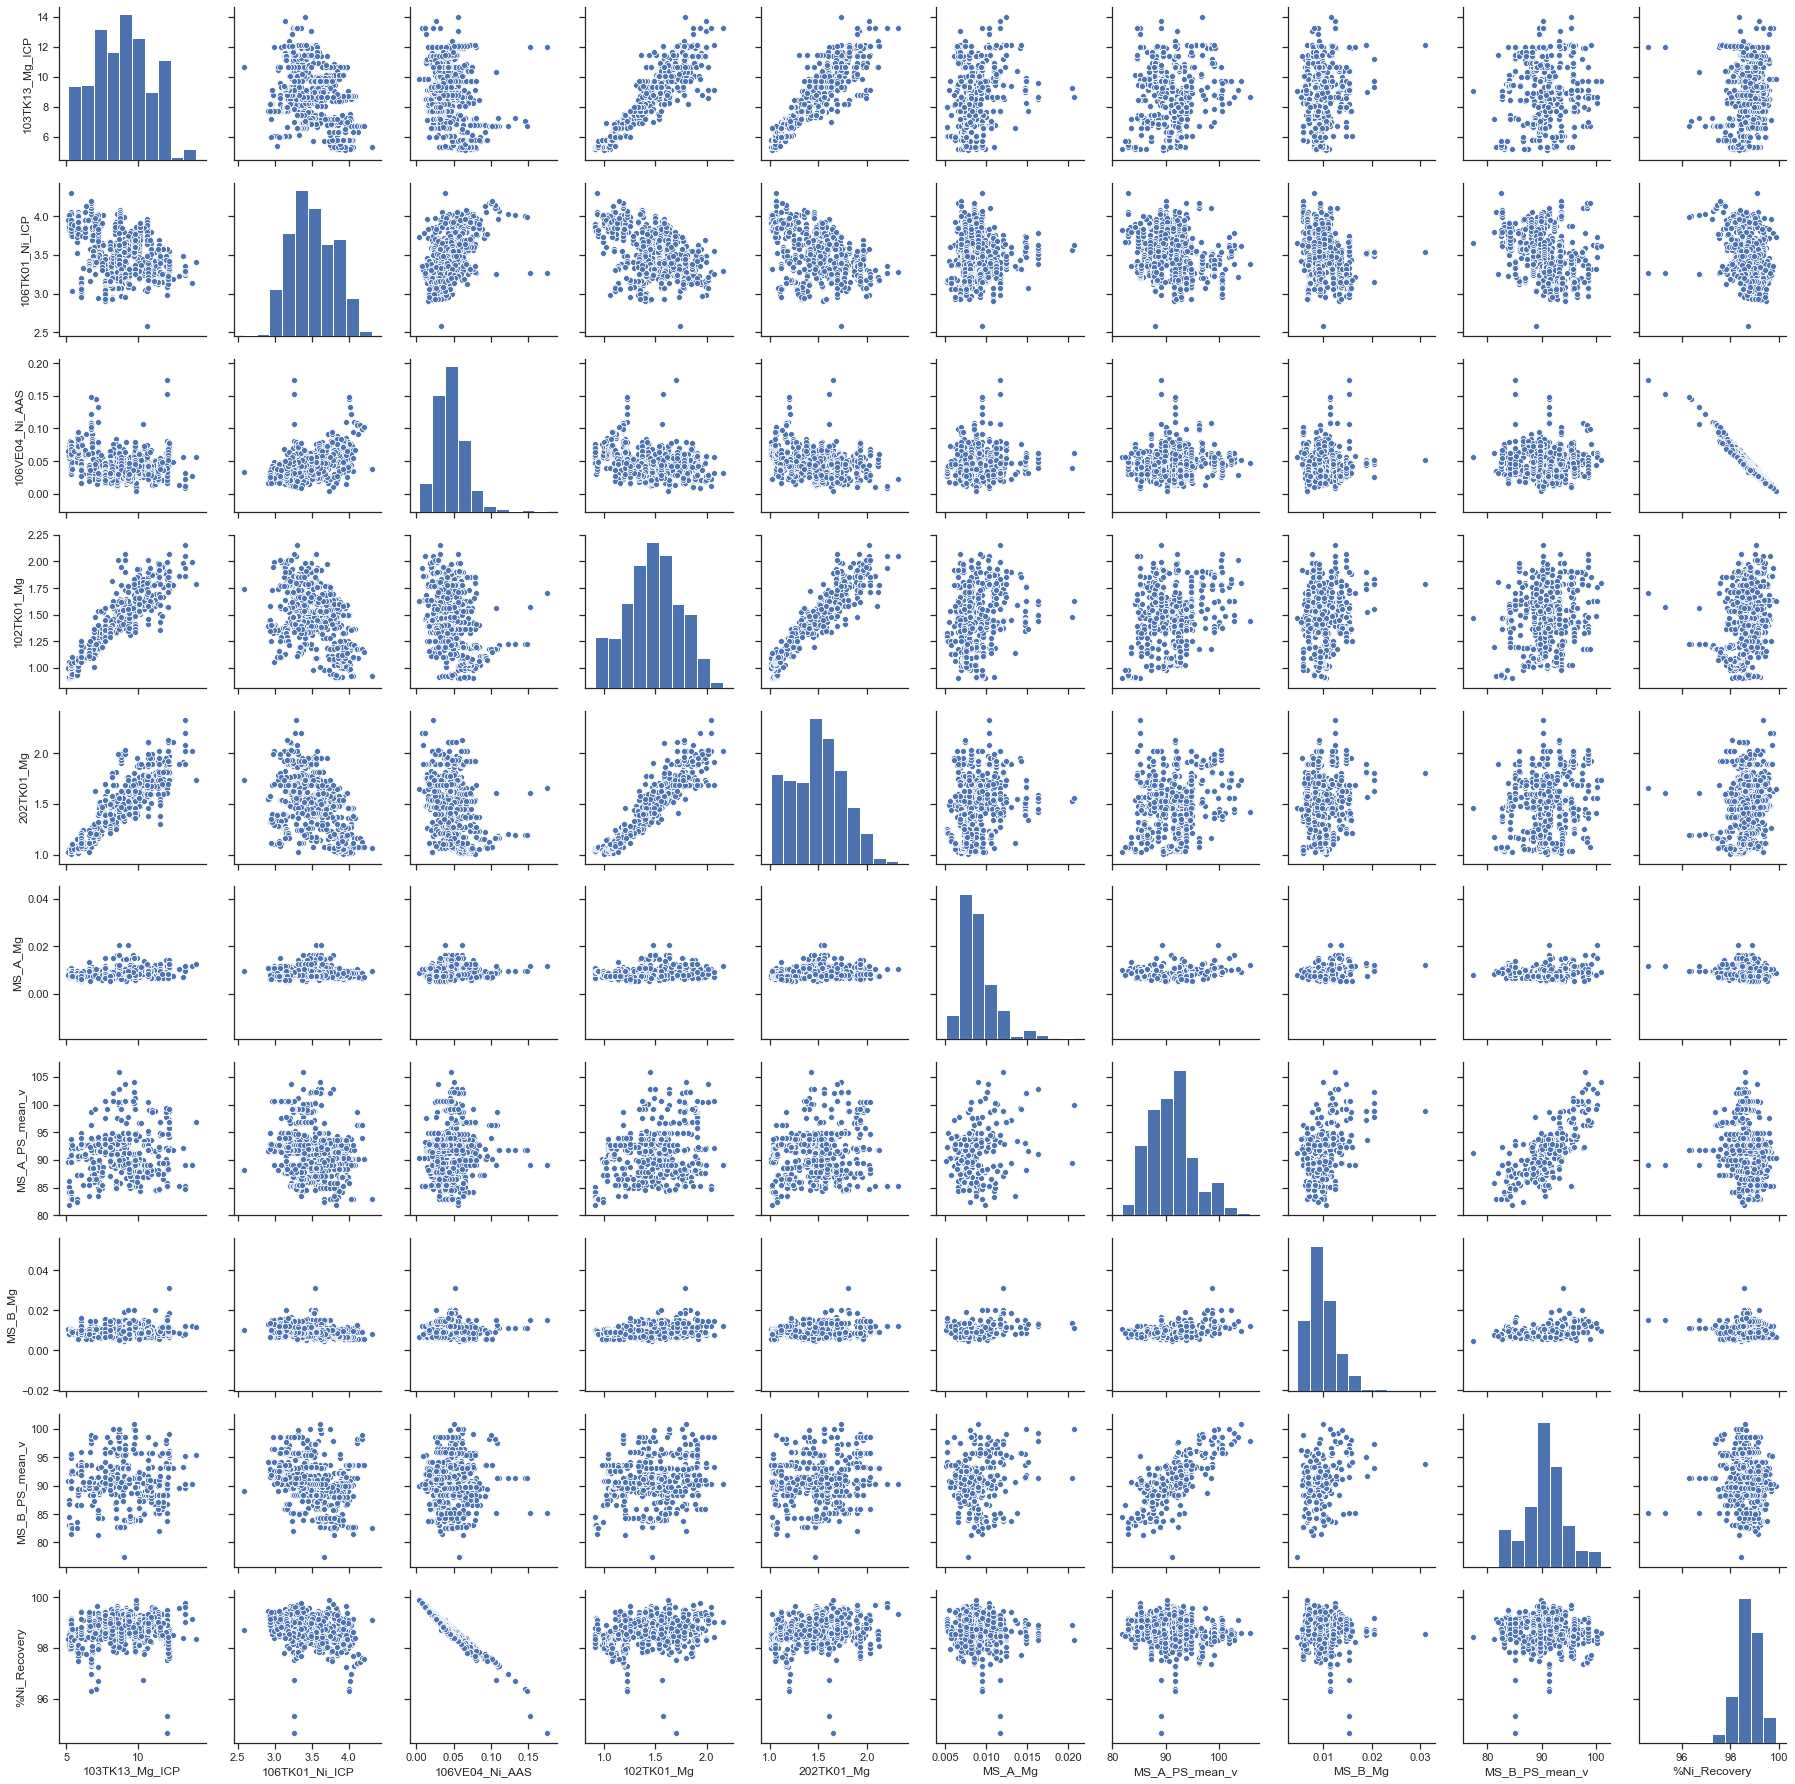

In [99]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

g = sns.pairplot(df_main)

In [79]:
df_main.columns

Index(['103TK13_Mg_ICP', '106TK01_Ni_ICP', '106VE04_Ni_AAS', '102TK01_Mg',
       '202TK01_Mg', 'MS_A_Mg', 'MS_A_PS_mean_v', 'MS_B_Mg', 'MS_B_PS_mean_v',
       '%Ni_Recovery'],
      dtype='object')

In [95]:
y_A_MS_mg = df_main['MS_A_Mg']
y_B_MS_mg = df_main['MS_B_Mg']
x_NiRecovey = df_main['%Ni_Recovery']
x_103TK13_Mg_ICP = df_main['103TK13_Mg_ICP']
x_102TK01_Mg = df_main['102TK01_Mg']
x_202TK01_Mg = df_main['202TK01_Mg']
x_MS_A_PS_mean_v = df_main['MS_A_PS_mean_v']
x_MS_B_PS_mean_v = df_main['MS_B_PS_mean_v']


In [96]:
df_above99 = df_main[df_main['%Ni_Recovery']>99]

In [97]:
#parameter for Mg
df_main_mg  = df_main[['103TK13_Mg_ICP', '102TK01_Mg',
       '202TK01_Mg', 'MS_A_Mg', 'MS_A_PS_mean_v', 'MS_B_Mg', 'MS_B_PS_mean_v',
       '%Ni_Recovery']]
df_main_mg_X_a  = df_main_mg[['103TK13_Mg_ICP', '102TK01_Mg',
       'MS_A_PS_mean_v','%Ni_Recovery']]
#Computing for coeff for Moisture
from sklearn.model_selection import train_test_split
X1 = df_main_mg_X_a.dropna()
y1 = df_main_mg['MS_A_Mg'].dropna()
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=0)

from sklearn.linear_model import LinearRegression
lm_mg_a = LinearRegression()
lm_mg_a.fit(X1_train,y1_train)

coeff_mg_a = pd.DataFrame(zip(lm_mg_a.coef_, X1.columns), columns=['Mg_A','param'])
print('Mg_A_coeff table: \n', coeff_mg_a, '\n intercept: ', lm_mg_a.intercept_)

Mg_A_coeff table: 
        Mg_A           param
0  0.000318  103TK13_Mg_ICP
1 -0.000551      102TK01_Mg
2  0.000085  MS_A_PS_mean_v
3 -0.000271    %Ni_Recovery 
 intercept:  0.025991720210512242


In [ ]:
#parameter for Mg
df_main_mg  = df_main[['103TK13_Mg_ICP', '102TK01_Mg',
       '202TK01_Mg', 'MS_A_Mg', 'MS_A_PS_mean_v', 'MS_B_Mg', 'MS_B_PS_mean_v',
       '%Ni_Recovery']]
df_main_mg_X_a  = df_main_mg[['103TK13_Mg_ICP', '102TK01_Mg',
       'MS_A_PS_mean_v','%Ni_Recovery']]
#Computing for coeff for Moisture
from sklearn.model_selection import train_test_split
X1 = df_main_mg_X_a.dropna()
y1 = df_main_mg['MS_A_Mg'].dropna()
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=0)

from sklearn.linear_model import LinearRegression
lm_mg_a = LinearRegression()
lm_mg_a.fit(X1_train,y1_train)

coeff_mg_a = pd.DataFrame(zip(lm_mg_a.coef_, X1.columns), columns=['Mg_A','param'])
print('Mg_A_coeff table: \n', coeff_mg_a, '\n intercept: ', lm_mg_a.intercept_)

In [91]:
df_above99.to_excel(r'C:\Users\v.t.flores\Documents\106FT02AB_data_MgPS_JAN2020_mgInv_NiRec_above99.xlsx')

In [98]:
df_main.to_excel(r'C:\Users\v.t.flores\Documents\106FT02AB_data_MgPS_Feb2020_mgInv.xlsx')

In [104]:
datetime.timedelta(hours=1)

datetime.timedelta(seconds=3600)

In [ ]:
def generate_df_from_analysis(workbookTab, col_sampleDate, col_sampleTime, col_analysis, col_title):
    #get the start and end sample dates
    Smpl_day_index = list()
    Chem_Element_datelist = list()
    Chem_Element_list = list()
    Smpl_day_index = list()
    Chem_Element_datelist = list()
    Chem_Element_list = list()
    plus_oneday_list = ['0:0:0', '1:0:0', '2:0:0', '3:0:0', '4:0:0', '5:0:0']
    #gets the date day from the B column of the analysis file if there is value in the cell
    for i in range(1, workbookTab.max_row):
        if type(workbookTab[str(col_sampleDate) + str(i)].value) == int or type(workbookTab[str(col_sampleDate) + str(i)].value) == float:
            Smpl_day_index.append(i)
    #get the ending row that has date day
    for j in range(1, workbookTab.max_row):
        if type(workbookTab[str(col_sampleTime) + str(j)].value) == datetime.datetime:
            smpl_end_index = j
    for y in range(0, len(Smpl_day_index)):
        if Smpl_day_index[y] != Smpl_day_index[-1]:      
            for x in range(Smpl_day_index[y], Smpl_day_index[y+1]):
                if workbookTab[str(col_analysis)+str(x)].value is None: 
                    pass
                else:
                    if time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value)) in plus_oneday_list:
                        date = str((currentmonthyr)+datetime.timedelta(workbookTab[str(col_sampleDate)+str(Smpl_day_index[y])].value))\
                        +' '+time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value))
                        Chem_Element_datelist.append(parse(date))  
                        chem_element = workbookTab[str(col_analysis)+str(x)].value
                        Chem_Element_list.append(chem_element)
                    else:
                        date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(workbookTab[str(col_sampleDate)+str(Smpl_day_index[y])].value))\
                        +' '+time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value))
                        Chem_Element_datelist.append(parse(date))  
                        chem_element = workbookTab[str(col_analysis)+str(x)].value
                        Chem_Element_list.append(chem_element)

        if Smpl_day_index[y] == Smpl_day_index[-1]:
            for x in range(Smpl_day_index[y], smpl_end_index+1):
                if workbookTab[str(col_analysis)+str(x)].value is None:   
                    pass
                else:
                    if time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value)) in plus_oneday_list:
                        date = str((currentmonthyr)+datetime.timedelta(workbookTab[str(col_sampleDate)+str(Smpl_day_index[y])].value))\
                        +' '+time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value))
                        Chem_Element_datelist.append(parse(date))
                        chem_element = workbookTab[str(col_analysis)+str(x)].value
                        Chem_Element_list.append(chem_element)
                    else:
                        date = str((currentmonthyr)-datetime.timedelta(1)+datetime.timedelta(workbookTab[str(col_sampleDate)+str(Smpl_day_index[y])].value))\
                        +' '+time_cleaner(str(workbookTab[str(col_sampleTime)+str(x)].value))
                        Chem_Element_datelist.append(parse(date))
                        chem_element = workbookTab[str(col_analysis)+str(x)].value
                        Chem_Element_list.append(chem_element)

    Chem_Element_list_pair = list(zip(Chem_Element_list, Chem_Element_datelist[0:]))
    Chem_Element_df = pd.DataFrame(Chem_Element_list_pair)
    Chem_Element_df.columns = [col_title, 'DATETIME'] ##check if list title is updated
    Chem_Element_df.set_index('DATETIME', inplace=True)

    return Chem_Element_df